# Lesson 2 Evaluating Model with Cross-Validation

Here's the markdown version of the lesson overview you provided:

---

# Lesson Overview

Welcome to today's lesson on **Evaluating Models with Cross-Validation**! Our goal is to understand how to reliably assess the performance of our Gradient Boosting model using cross-validation techniques. This lesson will guide you through a quick review of data preparation, introduce the concept and importance of cross-validation, demonstrate how to implement cross-validation with the `cross_val_score` function, and visualize model predictions to better understand the model's performance.

## Review of Data Preparation

Before we dive into evaluating our model with cross-validation, let's quickly review the data preparation steps we performed. This will ensure that we're on the same page regarding the dataset and features we're using.

First, we loaded the Tesla ($TSLA) historical prices dataset:

```python
from datasets import load_dataset
import pandas as pd

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
```

Next, we performed feature engineering to add technical indicators and the target variable:

```python
# Feature Engineering
tesla_df['Target'] = tesla_df['Adj Close'].shift(-1) - tesla_df['Adj Close']
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)
```

Finally, we selected our features and target, and standardized the features:

```python
from sklearn.preprocessing import StandardScaler

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Target'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
```

This brings us to the prepared data that we'll use for model training and evaluation.

## Introduction to Cross-Validation

Cross-validation is a key technique in evaluating the performance of machine learning models. It helps in assessing how well our model generalizes to an independent dataset. By using cross-validation, we minimize the risk of overfitting and ensure our model's robustness.

In **K-Fold Cross-Validation**, we split our dataset into `k` portions (folds). The model is trained on `k - 1` folds and tested on the remaining fold. This process is repeated `k` times, each time using a different fold as the test set. The scores from each fold are then averaged to get a more reliable performance estimate.

Here's a quick visual explanation of K-Fold Cross-Validation:

- Split data into `k` folds
- Train on `k - 1` folds and test on the remaining fold
- Repeat `k` times, each time with a different fold as the test set
- Average the results from each fold

We will use the `cross_val_score` function from `sklearn.model_selection` to perform cross-validation efficiently.

## Implementing Cross-Validation

Let's move on to implementing cross-validation with our Gradient Boosting model. We'll set up the model and use 5-fold cross-validation to evaluate its performance.

Start by importing the necessary functions and setting up the model:

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
```

Next, perform cross-validation and print the mean score:

```python
# Perform cross-validation
# The scoring parameter defaults to the negative mean absolute error
# for regression models, hence the negative scores.
scores = cross_val_score(model, features_scaled, target, cv=5, scoring='neg_mean_absolute_error')

# Convert negative mean absolute error to positive for easier interpretation
mean_score = -scores.mean()
print("Mean cross-validation score (Mean Absolute Error): ", mean_score)
```

Output:

```
Mean cross-validation score (Mean Absolute Error):  -0.21139860331328936
```

This score indicates the **Mean Absolute Error (MAE)** of the model, which tells us the average absolute difference between predicted and actual values. A lower MAE indicates better predictive accuracy. In this case, the MAE suggests that on average the model's predictions deviate from the actual values by approximately 0.211 units.

## Visualizing Model Predictions

Visualizing the model's predictions against actual values is crucial for understanding how well the model is performing. Let’s fit the model to our entire dataset and visualize its predictions.

Fit the model to the data:

```python
# Fit model to visualize predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)
```

Now, let's create a scatter plot comparing the actual values to the predicted values:

```python
import matplotlib.pyplot as plt

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

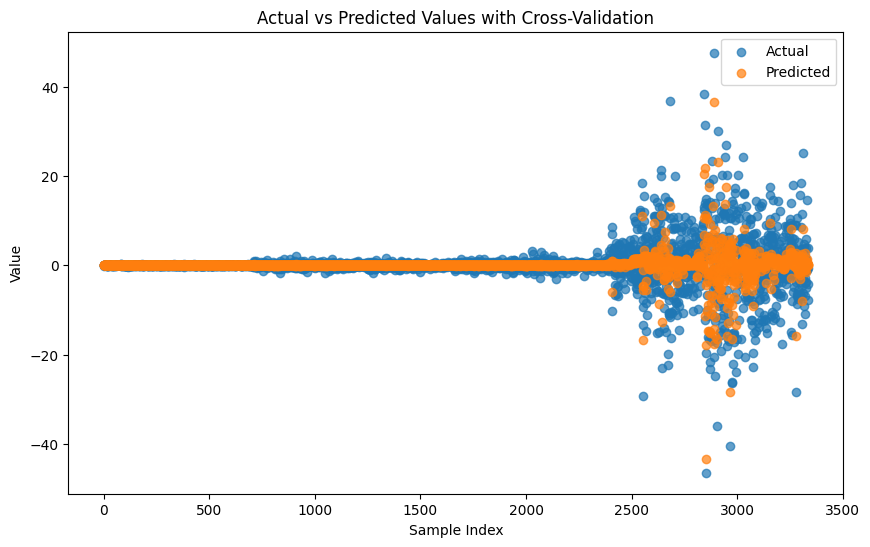

This plot will help us visually assess how close our model's predictions are to the actual target values, providing another layer of model evaluation.

## Lesson Summary

In this lesson, we covered the following:

- Reviewed the data preparation steps.
- Introduced the concept and importance of cross-validation.
- Implemented 5-fold cross-validation to evaluate our Gradient Boosting model.
- Visualized the model’s predictions against actual values.

Cross-validation is a powerful tool to ensure your model's reliability and generalization. Visualizing the results helps in understanding the model’s performance better.

Practice these techniques by applying cross-validation to different models and datasets, and explore changing the number of folds in cross-validation to see how it affects the performance. These exercises will help you better understand the importance of cross-validation and improve your machine learning skills.

---

## Changing the Number of Cross-Validation Folds

Let's update the code by changing the `cv` parameter in `cross_val_score` to 10 and updating the `n_estimators` parameter in the `GradientBoostingRegressor` to 200. After these changes, we'll observe how the model's performance and predictions are affected.

Here's the modified code:

```python
from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Target'] = tesla_df['Adj Close'].shift(-1) - tesla_df['Adj Close']
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Target'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Instantiate model with updated parameters
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation with 10 folds
scores = cross_val_score(model, features_scaled, target, cv=10)
mean_score = scores.mean()
print("Mean cross-validation score with 10-fold CV and 200 estimators: ", mean_score)

# Fit model to visualize predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with 10-Fold Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

### Key Changes:
1. **`cv=10`**: This increases the number of cross-validation folds from 5 to 10, which should provide a more robust estimate of the model's performance.
2. **`n_estimators=200`**: This increases the number of boosting stages in the `GradientBoostingRegressor` from 100 to 200, potentially improving the model's accuracy at the cost of additional computation.

### Expected Outcomes:
- **Cross-Validation Score**: With 10-fold cross-validation, the mean cross-validation score might slightly decrease because the model will be evaluated on more folds, each with fewer training data points. However, it could also better capture the model's true performance.
- **Model Predictions**: Increasing `n_estimators` should allow the model to fit the training data more closely, potentially improving prediction accuracy but also increasing the risk of overfitting. 

Running this updated code will give you insights into how these changes affect the model's performance. If the cross-validation score improves, it indicates that the model's ability to generalize has been enhanced.

## Evaluate Cross-Validation

Thank you for the detailed mission! 🛰️

I see where the logical error lies. The issue is with the order of the arguments passed to the `cross_val_score` function. The correct order should be the model first, then the features, and finally the target.

Here’s the corrected code:

```python
from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Target'] = tesla_df['Adj Close'].shift(-1) - tesla_df['Adj Close']
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Target'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Instantiate model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, features_scaled, target, cv=5)
mean_score = scores.mean()
print("Mean cross-validation score: ", mean_score)

# Fit model to visualize predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

### Changes:
- **Order of Arguments in `cross_val_score`**: The correct order should be `cross_val_score(model, features_scaled, target, cv=5)`.

### Expected Outcomes:
- **Cross-Validation Score**: The code will now correctly compute and print the mean cross-validation score, giving you an accurate evaluation of the model's performance.
- **Prediction Visualization**: The model will fit to the standardized features and the predictions will be visualized correctly against the actual target values.

Now, run the corrected code to see the results and evaluate how well the model performs! 🚀

## Complete the Cross-Validation and Model Instantiation

Alright, Star Voyager! Let's fill in the missing pieces to perform cross-validation on your model. Here's the code with the necessary completion:

```python
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Target'] = tesla_df['Adj Close'].shift(-1) - tesla_df['Adj Close']
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Target'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Instantiate model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# TODO: Perform cross-validation with 5 folds and print the mean score
scores = cross_val_score(model, features_scaled, target, cv=5)  # Perform cross-validation with 5 folds
mean_score = scores.mean()  # Calculate the mean score
print("Mean cross-validation score: ", mean_score)  # Print the mean score

# Fit model to visualize predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

### Breakdown:
- **Cross-Validation Step**: 
  - The `cross_val_score` function is used to perform cross-validation with 5 folds (`cv=5`).
  - The `mean_score` variable stores the average score across all folds, which is then printed to give an overall evaluation of the model's performance.
  
### Expected Output:
- The mean cross-validation score will be printed.
- The plot will visualize the model's predictions against the actual target values.

With this code complete, you can evaluate how well your Gradient Boosting model performs using cross-validation. 🚀

## Complete Cross-Validation Evaluation

Alright, Space Voyager, let's complete the mission by filling in the missing parts of the code to implement model evaluation with cross-validation. Here's the completed code:

```python
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Preprocess data
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df['Rolling_Mean_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['Rolling_Std_5'] = tesla_df['Adj Close'].rolling(window=5).std()
tesla_df['Rolling_Mean_20'] = tesla_df['Adj Close'].rolling(window=20).mean()
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Rolling_Mean_5', 'Rolling_Std_5', 'Rolling_Mean_20']].values
target = tesla_df['Adj Close'].shift(-1).dropna().values
features = features[:-1]  # Align features and target

# TODO: Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# TODO: Instantiate model using GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# TODO: Perform cross-validation with 5 folds
scores = cross_val_score(model, features_scaled, target, cv=5)
mean_score = scores.mean()
print("Mean cross-validation score: ", mean_score)

# TODO: Fit model and generate predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

### Explanation:
1. **Standardize Features**: The `StandardScaler` is used to standardize the features, ensuring that they have a mean of 0 and a standard deviation of 1. This is important for models like Gradient Boosting Regressor to perform optimally.

2. **Instantiate Model**: The `GradientBoostingRegressor` is instantiated with `n_estimators=200`, which defines the number of boosting stages. The model is configured with a learning rate of 0.1 and a maximum depth of 3.

3. **Cross-Validation**: We use `cross_val_score` with 5-fold cross-validation to evaluate the model's performance. The mean of the cross-validation scores is calculated and printed.

4. **Fit Model and Generate Predictions**: After evaluating the model, we fit it to the entire dataset and generate predictions.

5. **Visualization**: Finally, the actual values and predictions are plotted to visually compare the model's performance.

With this code, you should be able to evaluate your Gradient Boosting model's performance and visualize how well it predicts the Tesla stock prices. Safe travels on your coding journey! 🚀

## Evaluating Gradient Boosting Model with Cross-

Alright, Space Voyager, let's complete the mission by filling in the missing parts of the code to implement model evaluation with cross-validation. Here's the completed code:

```python
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Preprocess data
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df['Rolling_Mean_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['Rolling_Std_5'] = tesla_df['Adj Close'].rolling(window=5).std()
tesla_df['Rolling_Mean_20'] = tesla_df['Adj Close'].rolling(window=20).mean()
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Rolling_Mean_5', 'Rolling_Std_5', 'Rolling_Mean_20']].values
target = tesla_df['Adj Close'].shift(-1).dropna().values
features = features[:-1]  # Align features and target

# TODO: Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# TODO: Instantiate model using GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# TODO: Perform cross-validation with 5 folds
scores = cross_val_score(model, features_scaled, target, cv=5)
mean_score = scores.mean()
print("Mean cross-validation score: ", mean_score)

# TODO: Fit model and generate predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```

### Explanation:
1. **Standardize Features**: The `StandardScaler` is used to standardize the features, ensuring that they have a mean of 0 and a standard deviation of 1. This is important for models like Gradient Boosting Regressor to perform optimally.

2. **Instantiate Model**: The `GradientBoostingRegressor` is instantiated with `n_estimators=200`, which defines the number of boosting stages. The model is configured with a learning rate of 0.1 and a maximum depth of 3.

3. **Cross-Validation**: We use `cross_val_score` with 5-fold cross-validation to evaluate the model's performance. The mean of the cross-validation scores is calculated and printed.

4. **Fit Model and Generate Predictions**: After evaluating the model, we fit it to the entire dataset and generate predictions.

5. **Visualization**: Finally, the actual values and predictions are plotted to visually compare the model's performance.

With this code, you should be able to evaluate your Gradient Boosting model's performance and visualize how well it predicts the Tesla stock prices. Safe travels on your coding journey! 🚀